In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
from datetime import datetime

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings('ignore')

# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df2 = df.copy()
len(df2)

100000

In [4]:
df2.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.000,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.000,Good,809.98,31.945,NaN,No,49.575,118.2802216,Low_spent_Large_value_payments,284.6291625,Good


In [5]:
len(df2[df2.SSN == '#F%$D@*&8'])

5572

In [6]:
df2.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [7]:
df2.isna().any().sum() ## we have null values in 8 column

8

In [8]:
#Removing underscore 
df2['Num_of_Delayed_Payment'] = df2.Num_of_Delayed_Payment.str.rstrip('_')
df2['Monthly_Balance'] = df2.Monthly_Balance.str.rstrip('_')
df2['Monthly_Balance'] = df2.Monthly_Balance.str.lstrip('_')
df2['Amount_invested_monthly'] = df2.Amount_invested_monthly.str.rstrip('_')
df2['Amount_invested_monthly'] = df2.Amount_invested_monthly.str.lstrip('_')

In [9]:
df2.Monthly_Balance = df2.Monthly_Balance.astype(float)

In [10]:
df2.Amount_invested_monthly = df2.Amount_invested_monthly.astype(float)

In [11]:
lookup = df2.groupby(['Customer_ID','SSN'],as_index = False).agg({'Monthly_Inhand_Salary':'max',\
                         'Num_Credit_Inquiries':'max', 'Monthly_Balance':'mean', 'Amount_invested_monthly':'mean'})\
                        .rename(columns = \
                         {'Monthly_Inhand_Salary':'MIS_Max', \
                         'Num_Credit_Inquiries':'NCI_Max','Monthly_Balance':'MB_Mean', 'Amount_invested_monthly':'AIM_Mean'})

In [12]:
lookup.head()

,Customer_ID,SSN,MIS_Max,NCI_Max,MB_Mean,AIM_Mean
0,CUS_0x1000,913-74-1218,2706.162,11.000,335.375,158.550
1,CUS_0x1009,#F%$D@*&8,4250.390,2.000,335.462,261.211
2,CUS_0x1009,063-67-6938,4250.390,4.000,442.069,130.318
3,CUS_0x100b,#F%$D@*&8,9549.782,4.000,597.899,617.079
4,CUS_0x100b,238-62-0395,9549.782,2271.000,807.420,2069.207


In [66]:
lookup = lookup[lookup.SSN != '#F%$D@*&8']

In [90]:
df_ssn_update = df2.merge(lookup, left_on = 'Customer_ID', right_on = 'Customer_ID', how = 'left')

In [91]:
df_ssn_update[df_ssn_update['SSN_y' ]== '#F%$D@*&8']

,ID,Customer_ID,Month,Name,Age,SSN_x,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,SSN_y,MIS_Max,NCI_Max,MB_Mean,AIM_Mean


In [92]:
df_ssn_update = df_ssn_update.drop(columns = ['SSN_x'],axis = 1)

In [93]:
len(df2)
len(df_ssn_update)

100000

100000

In [94]:
df_ssn_update.Monthly_Inhand_Salary.replace(to_replace=NaN, value=0, inplace=True)
df_ssn_update.Num_Credit_Inquiries.replace(to_replace=NaN, value=0, inplace=True)

In [95]:
df_ssn_update['Monthly_Inhand_Salary'] = df_ssn_update.apply(lambda x: x.Monthly_Inhand_Salary \
                                                        if x.Monthly_Inhand_Salary > 0 else x.MIS_Max , axis = 1)

In [96]:
df_ssn_update = df_ssn_update.drop(columns = ['MIS_Max'],axis = 1)

In [97]:
df_ssn_update['Num_Credit_Inquiries'] = df_ssn_update.apply(lambda x: x.Num_Credit_Inquiries \
                                                        if x.Num_Credit_Inquiries > 0 else x.NCI_Max , axis = 1)

In [98]:
df_ssn_update = df_ssn_update.drop(columns = ['NCI_Max'],axis = 1)

In [99]:
df_ssn_update['Num_of_Delayed_Payment'] = df2.Num_of_Delayed_Payment.str.rstrip('_')

In [100]:
#Replace nan in this column with 0
df_ssn_update.Num_of_Delayed_Payment.fillna(0,inplace=True)

In [101]:
df_ssn_update.Monthly_Balance.replace(to_replace=NaN, value=0, inplace=True)
df_ssn_update.Monthly_Balance.fillna(0,inplace=True)
df_ssn_update.MB_Mean.fillna(0,inplace=True)

In [103]:
df_ssn_update['Monthly_Balance'] = df_ssn_update.apply(lambda x: x.Monthly_Balance \
                                                        if x.Monthly_Balance > 0 else x.MB_Mean , axis = 1)

In [102]:
df_ssn_update[df_ssn_update.MB_Mean.isnull()]

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,SSN_y,MB_Mean,AIM_Mean


In [104]:
df_ssn_update = df_ssn_update.drop(columns = ['MB_Mean'],axis = 1)

In [105]:
df_ssn_update['Amount_invested_monthly'] = df_ssn_update.apply(lambda x: x.Amount_invested_monthly \
                                                        if x.Amount_invested_monthly > 0 else x.AIM_Mean , axis = 1)

In [106]:
df_ssn_update = df_ssn_update.drop(columns = ['AIM_Mean'],axis = 1)

In [107]:
df_ssn_update.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
SSN_y                           0
dtype: int64

In [108]:
df_ssn_update.isna().any().sum()

3

In [109]:
#Because SSN is the unique column for identifying customer
df_ssn_update = df_ssn_update.drop(columns = ['Name'],axis = 1)

In [110]:
df_ssn_update.isna().any().sum()

2

In [111]:
df_clean = df_ssn_update

In [112]:
len(df_clean)

100000

In [113]:
df_clean.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
SSN_y                           0
dtype: int64

In [115]:
#df_clean.to_csv('df_clean.csv')

In [146]:
df_clean = pd.read_csv('df_clean.csv')

In [147]:
df_clean.isna().sum()

Unnamed: 0                      0
ID                              0
Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
SSN_y                           0
dtype: int64

In [148]:
df_clean = df_clean.drop(columns = ['Unnamed: 0'],axis = 1)

In [149]:
df_clean.Age.min()

'-500'

In [150]:
df_clean.Age.max()

'995'

In [151]:
df_clean['Age'] = df_clean.Age.str.strip('_')

In [152]:
df_clean.Age = df_clean.Age.astype(int)

In [153]:
df_age = df_clean[((df_clean.Age).astype(int)>-1) & ((df_clean.Age).astype(int)<100)]

In [154]:
df_age = df_age[['SSN_y','Age']]

In [155]:
df_age.Age.min()

14

In [156]:
df_age.Age.max()

99

In [157]:
len(df_clean)
len(df_age)

100000

97223

In [158]:
df_age = df_age.drop_duplicates()

In [159]:
df_age = df_age.drop_duplicates(subset = ['SSN_y'])

In [160]:
df_clean = df_clean.merge(df_age, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')

In [161]:
len(df_clean)

100000

In [162]:
df_clean = df_clean.drop(columns = ['Age_x'],axis = 1)

In [163]:
df_clean.Age_y.value_counts()

31    3208
38    3160
28    3024
26    3008
36    3000
34    2992
43    2976
21    2936
25    2912
27    2904
19    2888
41    2888
32    2872
24    2872
29    2832
35    2816
22    2816
40    2808
44    2808
37    2800
18    2800
20    2768
23    2744
33    2720
45    2712
39    2680
30    2672
42    2568
15    1656
14    1648
16    1560
49    1480
17    1440
48    1400
52    1400
53    1392
55    1360
51    1352
54    1336
46    1328
50    1232
47    1216
95       8
56       8
Name: Age_y, dtype: int64

In [164]:
df_clean.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
SSN_y                           0
Age_y                           0
dtype: int64

In [165]:
df_clean['Credit_History_Age'].unique()

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and

In [166]:
df_clean['Credit_History_Age'] = df_clean.Credit_History_Age.str.rstrip(' Months')

In [167]:
df_CHA = df_clean.Credit_History_Age.str.split(" Years and ",expand=True).rename(columns={0: 'Credit_history_years', 1: 'Credit_history_months'})

In [168]:
df_CHA.head(2)

,Credit_history_years,Credit_history_months
0,22,1
1,NaN,NaN


In [169]:
df_CHA['Credit_history_total_months'] = (df_CHA.Credit_history_months).astype(float) + ((df_CHA.Credit_history_years).astype(float))*12

In [170]:
df_CHA.head(2)

,Credit_history_years,Credit_history_months,Credit_history_total_months
0,22,1,265.000
1,NaN,NaN,NaN


In [171]:
df_clean['Credit_History_Age'] = df_CHA['Credit_history_total_months']

In [173]:
df_clean.head()

,ID,Customer_ID,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,SSN_y,Age_y
0,0x1602,CUS_0xd40,January,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.000,_,809.98,26.823,265.000,No,49.575,80.415,High_spent_Small_value_payments,312.494,Good,821-00-0265,23
1,0x1603,CUS_0xd40,February,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,0,11.27,4.000,Good,809.98,31.945,NaN,No,49.575,118.280,Low_spent_Large_value_payments,284.629,Good,821-00-0265,23
2,0x1604,CUS_0xd40,March,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.000,Good,809.98,28.609,267.000,No,49.575,81.700,Low_spent_Medium_value_payments,331.210,Good,821-00-0265,23
3,0x1605,CUS_0xd40,April,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.000,Good,809.98,31.378,268.000,No,49.575,199.458,Low_spent_Small_value_payments,223.451,Good,821-00-0265,23
4,0x1606,CUS_0xd40,May,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,0,11.27,4.000,Good,809.98,24.797,269.000,No,49.575,41.420,High_spent_Medium_value_payments,341.489,Good,821-00-0265,23


In [174]:
df_clean.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
SSN_y                           0
Age_y                           0
dtype: int64

In [175]:
df_clean.head(2)

,ID,Customer_ID,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,SSN_y,Age_y
0,0x1602,CUS_0xd40,January,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.000,_,809.98,26.823,265.000,No,49.575,80.415,High_spent_Small_value_payments,312.494,Good,821-00-0265,23
1,0x1603,CUS_0xd40,February,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,0,11.27,4.000,Good,809.98,31.945,NaN,No,49.575,118.280,Low_spent_Large_value_payments,284.629,Good,821-00-0265,23


In [178]:
df_clean['Occupation'] = df_clean.Occupation.apply(lambda x: 1 if x == 'Scientist' else 2 if x == 'Teacher' \
                                             else 3 if x == 'Engineer' else 4 if x == 'Entrepreneur' \
                                             else 5 if x == 'Developer' else 6 if x == 'Lawyer' \
                                             else 7 if x == 'Media_Manager' else 8 if x == 'Doctor'\
                                            else 9 if x == 'Journalist' else 10 if x == 'Manager' else 11\
                                            if x=='Accountant' else 12 if x=='Musician' else 13 if x=='Mechanic'\
                                            else 14 if x=='Writer' else 15 if x=='Architect' else 0)

In [180]:
df_clean['Month'] = df_clean.Month.apply(lambda x: 1 if x == 'January' else 2 if x == 'February' else 3 if x == 'March'\
                                  else 4 if x == 'April' else 5 if x=='May' else 6 if x=='June' else 7 if x =='July'\
                                  else 8 if x == 'August' else 9 if x =='September' else 10 if x =='October'\
                                  else 11 if x=='November' else 12)

In [181]:
df_clean.head()

,ID,Customer_ID,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,SSN_y,Age_y,Occupation_num
0,0x1602,CUS_0xd40,1,1,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.000,_,809.98,26.823,265.000,No,49.575,80.415,High_spent_Small_value_payments,312.494,Good,821-00-0265,23,1
1,0x1603,CUS_0xd40,2,1,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,0,11.27,4.000,Good,809.98,31.945,NaN,No,49.575,118.280,Low_spent_Large_value_payments,284.629,Good,821-00-0265,23,1
2,0x1604,CUS_0xd40,3,1,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.000,Good,809.98,28.609,267.000,No,49.575,81.700,Low_spent_Medium_value_payments,331.210,Good,821-00-0265,23,1
3,0x1605,CUS_0xd40,4,1,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.000,Good,809.98,31.378,268.000,No,49.575,199.458,Low_spent_Small_value_payments,223.451,Good,821-00-0265,23,1
4,0x1606,CUS_0xd40,5,1,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,0,11.27,4.000,Good,809.98,24.797,269.000,No,49.575,41.420,High_spent_Medium_value_payments,341.489,Good,821-00-0265,23,1


In [182]:
df_clean = df_clean.drop(columns = ['Type_of_Loan'],axis = 1)

In [183]:
df_clean.head(3)

,ID,Customer_ID,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,SSN_y,Age_y,Occupation_num
0,0x1602,CUS_0xd40,1,1,19114.12,1824.843,3,4,3,4,3,7,11.27,4.000,_,809.98,26.823,265.000,No,49.575,80.415,High_spent_Small_value_payments,312.494,Good,821-00-0265,23,1
1,0x1603,CUS_0xd40,2,1,19114.12,1824.843,3,4,3,4,-1,0,11.27,4.000,Good,809.98,31.945,NaN,No,49.575,118.280,Low_spent_Large_value_payments,284.629,Good,821-00-0265,23,1
2,0x1604,CUS_0xd40,3,1,19114.12,1824.843,3,4,3,4,3,7,_,4.000,Good,809.98,28.609,267.000,No,49.575,81.700,Low_spent_Medium_value_payments,331.210,Good,821-00-0265,23,1


In [198]:
df_clean['Credit_Score'] = df_clean.Credit_Score.apply(lambda x: 2 if x == 'Good' else 0 if x == 'Poor' else 1)

In [201]:
df_clean.head(2)

,ID,Customer_ID,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,SSN_y,Age_y,Occupation_num
0,0x1602,CUS_0xd40,1,1,19114.12,1824.843,3,4,3,4,3,7,11.27,4.000,_,809.98,26.823,265.000,No,49.575,80.415,High_spent_Small_value_payments,312.494,2,821-00-0265,23,1
1,0x1603,CUS_0xd40,2,1,19114.12,1824.843,3,4,3,4,-1,0,11.27,4.000,Good,809.98,31.945,NaN,No,49.575,118.280,Low_spent_Large_value_payments,284.629,2,821-00-0265,23,1


In [202]:
df_clean = df_clean.drop(columns = ['Credit_Mix'],axis = 1)

<AxesSubplot:ylabel='Payment_Behaviour'>

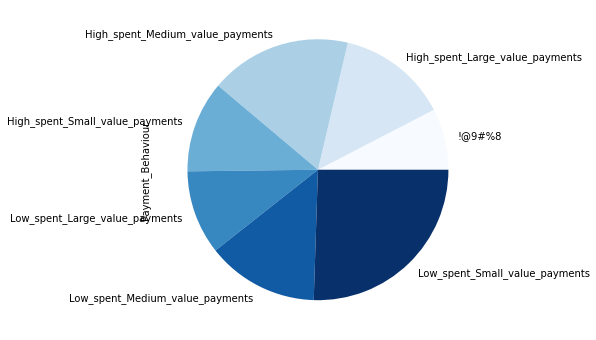

In [203]:
df_clean.groupby('Payment_Behaviour')['Payment_Behaviour'].count().\
                plot(kind='pie',figsize=(10,6),cmap="Blues")

In [204]:
df_clean = df_clean.drop(columns = ['Payment_Behaviour'],axis = 1)

In [207]:
df_clean = df_clean.drop(columns = ['ID','Customer_ID'],axis = 1)

In [208]:
df_clean.head()

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,SSN_y,Age_y,Occupation_num
0,1,1,19114.12,1824.843,3,4,3,4,3,7,11.27,4.000,809.98,26.823,265.000,No,49.575,80.415,312.494,2,821-00-0265,23,1
1,2,1,19114.12,1824.843,3,4,3,4,-1,0,11.27,4.000,809.98,31.945,NaN,No,49.575,118.280,284.629,2,821-00-0265,23,1
2,3,1,19114.12,1824.843,3,4,3,4,3,7,_,4.000,809.98,28.609,267.000,No,49.575,81.700,331.210,2,821-00-0265,23,1
3,4,1,19114.12,1824.843,3,4,3,4,5,4,6.27,4.000,809.98,31.378,268.000,No,49.575,199.458,223.451,2,821-00-0265,23,1
4,5,1,19114.12,1824.843,3,4,3,4,6,0,11.27,4.000,809.98,24.797,269.000,No,49.575,41.420,341.489,2,821-00-0265,23,1


In [209]:
df_clean['Payment_of_Min_Amount_num'] = df_clean.Payment_of_Min_Amount.apply(lambda x: 1 if x == 'Yes' else 2 if x == 'NM' else 0)

In [214]:
df_clean.head()

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,SSN_y,Age_y,Occupation_num,Payment_of_Min_Amount_num
0,1,1,19114.12,1824.843,3,4,3,4,3,7,11.27,4.000,809.98,26.823,265.000,No,49.575,80.415,312.494,2,821-00-0265,23,1,0
1,2,1,19114.12,1824.843,3,4,3,4,-1,0,11.27,4.000,809.98,31.945,0.000,No,49.575,118.280,284.629,2,821-00-0265,23,1,0
2,3,1,19114.12,1824.843,3,4,3,4,3,7,_,4.000,809.98,28.609,267.000,No,49.575,81.700,331.210,2,821-00-0265,23,1,0
3,4,1,19114.12,1824.843,3,4,3,4,5,4,6.27,4.000,809.98,31.378,268.000,No,49.575,199.458,223.451,2,821-00-0265,23,1,0
4,5,1,19114.12,1824.843,3,4,3,4,6,0,11.27,4.000,809.98,24.797,269.000,No,49.575,41.420,341.489,2,821-00-0265,23,1,0


In [238]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Month                      100000 non-null  int64  
 1   Occupation                 100000 non-null  int64  
 2   Annual_Income              100000 non-null  object 
 3   Monthly_Inhand_Salary      100000 non-null  float64
 4   Num_Bank_Accounts          100000 non-null  int64  
 5   Num_Credit_Card            100000 non-null  int64  
 6   Interest_Rate              100000 non-null  int64  
 7   Num_of_Loan                100000 non-null  object 
 8   Delay_from_due_date        100000 non-null  int64  
 9   Num_of_Delayed_Payment     100000 non-null  int64  
 10  Changed_Credit_Limit       100000 non-null  object 
 11  Num_Credit_Inquiries       100000 non-null  float64
 12  Outstanding_Debt           100000 non-null  object 
 13  Credit_Utilization_Ratio   100

In [213]:
df_clean.Credit_History_Age.fillna(0,inplace=True)

In [249]:
df_clean.head(3)

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,SSN_y,Age_y,Occupation_num,Payment_of_Min_Amount_num
0,1,1,19114.12,1824.843,3,4,3,4,3,7,11.27,4.000,809.98,26.823,265.000,0,49.575,80.415,312.494,2,821-00-0265,23,1,0
1,2,1,19114.12,1824.843,3,4,3,4,-1,0,11.27,4.000,809.98,31.945,0.000,0,49.575,118.280,284.629,2,821-00-0265,23,1,0
2,3,1,19114.12,1824.843,3,4,3,4,3,7,0,4.000,809.98,28.609,267.000,0,49.575,81.700,331.210,2,821-00-0265,23,1,0


In [250]:
df_clean.replace(to_replace = '', value = 0, inplace =True)
df_clean.replace(to_replace = 'No', value = 0, inplace =True)
df_clean.replace(to_replace = 'NM', value = 0, inplace =True)
df_clean.replace(to_replace = 'Yes', value = 0, inplace =True)

In [280]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [285]:
df_clean = df_clean.drop(columns = ['SSN_y'],axis = 1)
df_clean = df_clean.drop(columns = ['Changed_Credit_Limit'],axis = 1)

In [284]:
df_clean.Month = df_clean.Month.str.strip('_')
#df_clean = df_clean.Month.str.strip('_')

In [255]:
df_clean = df_clean.astype(float)

In [286]:
X = df_clean.drop(columns='Credit_Score')

In [287]:
Y = df_clean.Credit_Score

In [288]:
dt = tree.DecisionTreeClassifier(max_depth=3)

In [289]:
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=3)

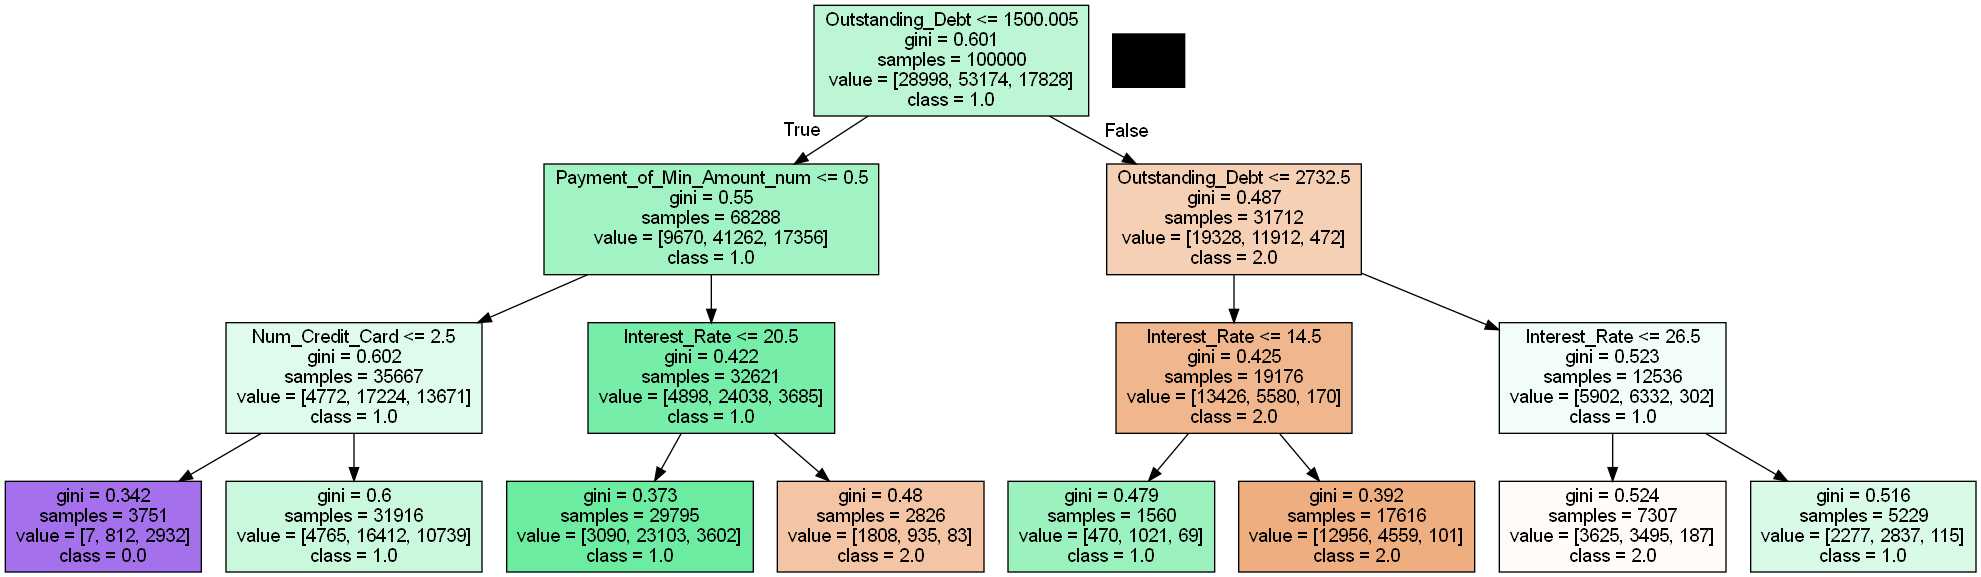

In [290]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [264]:
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=4, random_state=0)

In [265]:
clu.fit(df_clean)

KMeans(n_clusters=4, random_state=0)

In [266]:
clu.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [267]:
df_clean['cluster']=clu.labels_

In [268]:
df_clean.groupby('cluster').mean()

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Age_y,Occupation_num,Payment_of_Min_Amount_num
cluster,,,,,,,,,,,,,,,,,,,,,,,
0,4.500,7.393,176426.789,4199.796,17.092,22.476,72.472,3.010,21.069,28.760,10.172,40.224,1426.235,32.285,201.220,0.000,1403.098,638.489,395.907,0.888,33.030,7.393,0.763
1,4.167,5.833,33094.191,2840.183,3.167,4.333,8.000,2.833,12.500,7.167,10.100,6.833,1006.423,34.337,194.333,0.000,2348.871,203.817,-47619047619047613953736704.000,1.167,35.167,5.833,0.667
2,5.667,8.667,93486.080,7782.507,5.667,7.000,17.333,4.000,17.333,14.667,15.540,6.333,1766.400,35.084,265.000,0.000,192.136,348.264,-41666666666666655767068672.000,0.667,35.000,8.667,1.000
